# Mathematical Characters Recognition + 1-Digit Calculation

### Trained Tensorflow Model that recognizes mathematical characters including digits as well as arithmetic operation symbols. The model is further used to read any handwritten 1-digit calculation images and proceed to output the answer.

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import os
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pathlib import Path
from PIL import Image
print('imported')

imported


In [3]:
symblist=['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [4]:
path="../input/handwritten-math-symbol-dataset/train"
train_images=[]
train_labels=[]
for dir in os.listdir(path):
    if dir.split()[0] in symblist:
        for image_name in os.listdir(path+'/'+dir):
            train_labels.append(dir.split()[0])
            train_images.append(path+'/'+dir+'/'+image_name)

In [5]:
eval_path = "../input/handwritten-math-symbol-dataset/eval"
test_images = []
test_labels = []
for dir in os.listdir(eval_path):
    if dir.split()[0] in symblist:
        for image_name in os.listdir(eval_path+'/'+dir):
            test_labels.append(dir.split()[0])
            test_images.append(eval_path+'/'+dir+'/'+image_name)

In [6]:
X=[]
X_test=[]

for path in train_images:
    img=cv2.imread(path)
    img=cv2.resize(img,(100,100))
    img=np.array(img)
    X.append(img)
    
for path in test_images:
    img=cv2.imread(path)
    img=cv2.resize(img,(100,100))
    img=np.array(img)
    X_test.append(img)
    
X=np.array(X)
X_test=np.array(X_test)

In [7]:
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255

In [14]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)
y = keras.utils.to_categorical(y, 16)
y_test = keras.utils.to_categorical(y_test, 16)

In [15]:
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(16, activation="softmax"))

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [24]:
model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=20,
    validation_data=(X_val,y_val)
)

Epoch 1/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 280s 368ms/step - accuracy: 0.3532 - loss: 2.1080 - val_accuracy: 0.8274 - val_loss: 0.5667
Epoch 2/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 275s 364ms/step - accuracy: 0.8198 - loss: 0.5952 - val_accuracy: 0.8909 - val_loss: 0.3583
Epoch 3/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 322s 364ms/step - accuracy: 0.8874 - loss: 0.3359 - val_accuracy: 0.9034 - val_loss: 0.3244
Epoch 4/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 284s 376ms/step - accuracy: 0.9291 - loss: 0.2309 - val_accuracy: 0.9299 - val_loss: 0.2582
Epoch 5/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 273s 361ms/step - accuracy: 0.9557 - loss: 0.1503 - val_accuracy: 0.9233 - val_loss: 0.2661
Epoch 6/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 273s 362ms/step - accuracy: 0.9548 - loss: 0.1297 - val_accuracy: 0.9332 - val_loss: 0.2436
Epoch 7/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 273s 361ms/step - accuracy: 0.9690 - loss: 0.1009 - val_accuracy: 0.9352 - val_loss: 0.2327
Epoch 8/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 281s 372ms/step - accuracy: 0.9724 -

In [29]:
pred = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step
Loss: 0.3512406647205353, Accuracy: 0.9247524738311768


In [30]:
def predtoans(pred):
    
    if pred == 15:
        return 0    
    elif pred == 8:
        return 1
    elif pred == 14:
        return 2
    elif pred == 12:
        return 3
    elif pred == 5:
        return 4
    elif pred == 4:
        return 5
    elif pred == 11:
        return 6
    elif pred == 10:
        return 7
    elif pred == 2:
        return 8
    elif pred == 7:
        return 9
    elif pred == 9:
        return '+'
    elif pred == 6:
        return '-'
    elif pred == 1:
        return '/'
    elif pred == 3:
        return '='
    elif pred == 0:
        return '.'
    elif pred == 13:
        return '*'
    
def calculate(par1, sym, par2):
    if sym == "+":
        return par1 + par2
    elif sym == "-":
        return par1 - par2
    elif sym == "/":
        return par1 / par2
    elif sym == ".":
        return str(str(par1) + sym + str(par2))
    elif sym == "*":
        return par1 * par2

In [50]:
def calculate_ans_from_image(img_path): 
    image=Image.open(img_path)
    equation = []
    predtext=[]
    width, height = image.size 
    print("Width : " , width, " , Height : ", height)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    fig, axs= plt.subplots(1,3)
    div = int(width/3)

    for i in range(0,3):
        left = i * div
        top = 0
        right = (i+1) * div
        bottom = height 
    
        temp_img = image.crop((left, top, right, bottom))
    
        temp_img = temp_img.resize((100,100)) 
        img = np.array(temp_img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')
        img /= 255

        pred = model.predict(img)        
        result = np.argmax(pred,axis=1)
        result=predtoans(result)

        equation.append(result)
        predtext.append(str(result))
        axs[i].imshow(temp_img)
        axs[i].set_title(str("Prediction: " + predtext[i]), fontsize = 14)   

    
    plt.show()
    ans=str(calculate(equation[0], predtext[1] , equation[2]))
    print(predtext[0],predtext[1], predtext[2], " = ", ans)
    
    return ans

Width :  349  , Height :  143


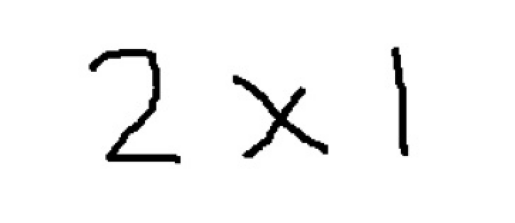

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


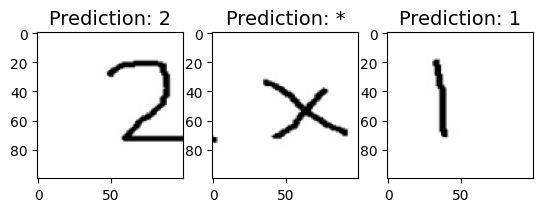

2 * 1  =  2


In [51]:
image_path1='/kaggle/input/test-calc1/stest1.jpg'
ans1=calculate_ans_from_image(image_path1)

Width :  1045  , Height :  420


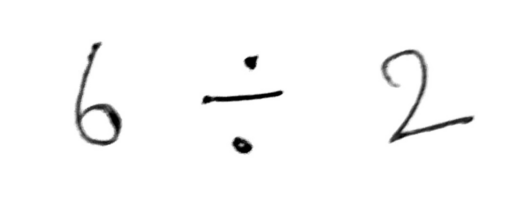

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


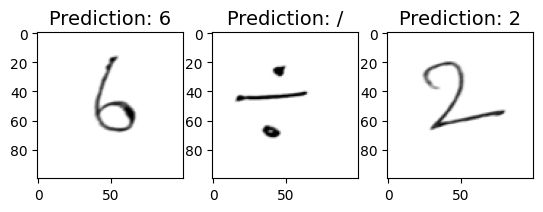

6 / 2  =  3.0


In [52]:
# Testing my own hadwritten one-digit calculation.
image_path2='/kaggle/input/ptest-3/pt2.jpg'
ans2=calculate_ans_from_image(image_path2)

### The model is successful at predicting mathematical characters and calculating handwritten 1-digit calculations.